# Inverse Survival Function (ISF):

Pamiętamy, że Survival Function miała postać 

$$
SF(x)=1-CDF(x).
$$

Pamiętamy również, żę Percentile Point Function (PPF) odwrotna do dystrybun=anty mizła postać: 

$$
PPF(x)=CDF^{-1}(x).
$$

Funkcja PPF pozwalała nam liczyć kwantyle, czyli rozwiązać problem:

Jak znaleść najmniejszą taką wartość, że jest ona większa od $p$ (np. $p=0.75$) innych liczb. 

Funkcja ISF to funkcja odwrotna do $SF$:

$$
ISF(x)=SF^{-1}(x).
$$

Za pomocą ISF możemy rozwiązać problem:

Jak znaleść największą taką wartość, że jest ona mniejsza od $p$ (np. $p=0.75$) innych liczb. 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Będziemy liczyć kwantyl rzedu $p=0.5$

In [3]:
p=0.75

Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [4]:
(mu, sigma)=(0,1)
nd=stats.norm(mu, sigma)

# Zadanie 1
Narysuj na oddzielnych wykresach: 
<ul>
<li> gęstość rozkładu normalnego </li>
<li> jeden minus dystrybuanta rozkładu normalnego ($1-CDF(x)$) </li>
<li> funkcję $ISF$ </li>
</ul>

i zaznacz na nich odpowiednie wartości tak by muc odtworzyć poniższy rysunek.

0.75


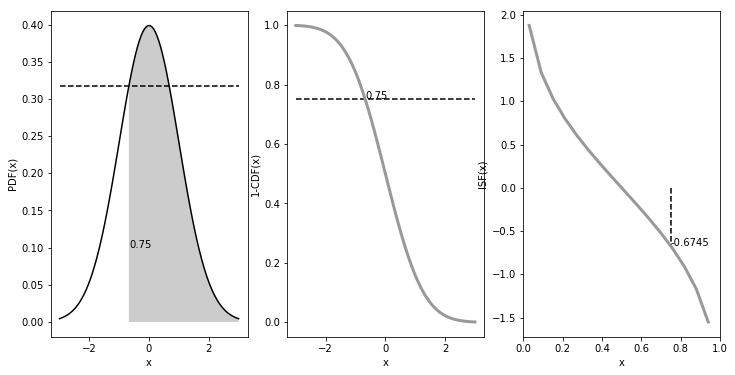

In [22]:
x0=stats.norm.isf(p)
(inte,err)=integrate.quad(lambda x: nd.pdf(x), x0,np.inf)
print(np.round(inte,4))
x = np.linspace(-3,3,100)
yp = nd.pdf(x)
yppf = nd.ppf(x)
yisf = nd.isf(x)
y = 1-nd.cdf(x)
x1 = np.linspace(x0,3)
y1 = nd.pdf(x1)

figs, axs = plt.subplots(1,3, figsize=(12, 6))
axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(x0, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')
axs[0].hlines(nd.pdf(x0), -3, 3, linestyles='--')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('1-CDF(x)')
axs[1].text(x0, 1-nd.cdf(x0), np.round(1-nd.cdf(x0),4))
axs[1].hlines(p, -3, 3, linestyles='--')

axs[2].plot(x, yisf, '#999999', lw=3)
axs[2].set_xlabel('x')
axs[2].set_ylabel('ISF(x)')
axs[2].set_xlim([0,1])
#axs[2].set_ylim([0,1])
axs[2].text(p, nd.isf(p), np.round(nd.isf(p),4))
axs[2].vlines(p, 0, nd.isf(p), linestyles='--')
plt.show()
